In [1]:
# http://db.csail.mit.edu/labdata/labdata.html

In [2]:
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression # importa o modelo
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import sklearn.manifold as skm
from sklearn import metrics
import scipy.stats as stats
import seaborn as sns
import random as rdn
import pandas as pd
import numpy as np
import scipy as sp
import datetime
import time

## Reading Dataset

In [3]:
# setting names to columns
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
data = pd.read_csv("dataset/data.txt", delimiter = " ", names = data_column_names)

In [4]:
data.head(3)

,Date,Time,Epoch,Moteid,Temperature,Humidity,Light,Voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742


### Missing Data

/home/igorfarias/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Percentage')

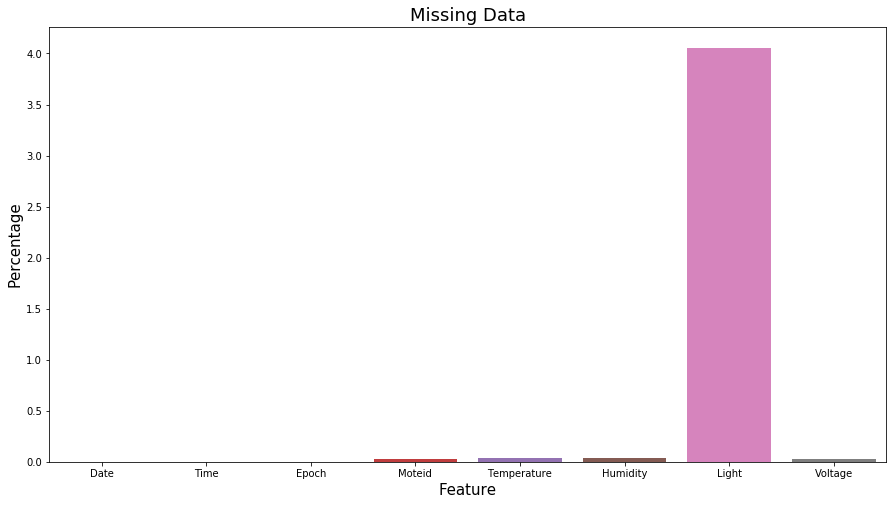

In [38]:
missing = pd.DataFrame((data.isnull().sum() * 100 )/ data.shape[0]).reset_index().rename(columns = {'index': 'Feature', 0: 'Percent'})
p = sns.barplot(x = 'Feature', y = 'Percent', data = missing, ax = plt.subplots(figsize = (15, 8))[1])
p.set_title('Missing Data', fontsize = 18)
p.set_xlabel('Feature', fontsize = 15)
p.set_ylabel('Percentage', fontsize = 15)

In [39]:
# removing null and inf id's
data.dropna(subset = ['Moteid'], inplace = True)
data['Moteid'] = data['Moteid'].astype(np.int) # moteid id the id sensor in the lab

# change features order
data = data[["Moteid", "Epoch", "Humidity", "Light", "Voltage", "Date", "Time", "Temperature"]]

## Change dataset

In [42]:
# dataset to model
new_data = data[data['Epoch'] > 1].copy()
new_data = new_data.dropna() # removing missing data
new_data.isnull().sum() # check

# excluindo épocas nulas
new_data = new_data[(new_data["Moteid"] < 54) & (new_data["Moteid"] > 1)]  

In [45]:
print("Amount of Epochs: {}".format(new_data['Epoch'].unique().shape[0]))

Amount of Epochs: 65534


## Creating a model

In [48]:
# array of epochs
epochs = new_data['Epoch'].unique()[:5]

In [51]:
new_data.shape

(177, 8)

In [50]:
new_data = new_data[new_data['Epoch'].isin(epochs)]

In [133]:
regr = LinearRegression()

features_ = []
for feature in ['Light', 'Voltage', 'Humidity']:
    epochs_error_mean = []
    epochs_error_sqrt = []
    for ep in epochs:
        
        X_train, y_train = new_data[new_data['Epoch'] != ep][[feature]], new_data[new_data['Epoch'] != ep]['Temperature']
        X_test, y_test = new_data[new_data['Epoch'] == ep][[feature]], new_data[new_data['Epoch'] == ep]['Temperature']

        regr.fit(X_train, y_train) # fitting model

        y_pred = regr.predict(X_test)
        error = mean_squared_error(y_test, y_pred)

        epochs_error_mean.append(error) # array of mean squared errors
        epochs_error_sqrt.append(np.sqrt(error)) # array of sqrt mean squared error
    
    features_.append(epochs_error_mean)
#epochs_error_mean
pd.DataFrame(np.array(features_).T, columns = ['Temp~Light', 'Temp~Voltage', 'Temp~Humidity']).set_index(epochs).reset_index().rename(columns = {'index': 'Epoch'})
#np.array(features_).shape

,Epoch,Temp~Light,Temp~Voltage,Temp~Humidity
0,2,3907.348593,1052.484763,665.123915
1,21,668.381371,223.623566,12.415613
2,25,666.834049,262.453161,10.083226
3,58,604.495781,150.576558,10.268495
4,61,203.860043,129.883504,11.594031


In [112]:
X2 = new_data[['Humidity']]
y2 = new_data['Temperature']
regr2 = LinearRegression()
regr2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
new_data[new_data['Epoch'] == 2].shape

(38, 8)

In [128]:
new_data.Epoch.unique()
[143.76260022250588, 143.76260022250588, 143.76260022250588, 143.76260022250588, 143.76260022250588]

array([ 2, 21, 25, 58, 61], dtype=int64)

In [131]:
count = 0
mean_epoch=[]
for i in new_data.Epoch.unique():
    aux = new_data[new_data['Epoch']==2]
    print(aux.shape)
    scores = cross_val_score(regr2, X2, y2, cv=aux.shape[0], scoring='mean_squared_error')
    mean_epoch.append(abs(scores).mean()) 
#     mean_epoch.append(abs(scores)) 
    count+=1
#     if count==38:
#         break
print(mean_epoch)

(38, 8)
(38, 8)

C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_square

C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_square


(38, 8)
(38, 8)


C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_square

(38, 8)
[143.76260022250588, 143.76260022250588, 143.76260022250588, 143.76260022250588, 143.76260022250588]


C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_square

In [91]:
epochs_error_mean

[665.1239146876059,
 12.415612680189163,
 10.083225852101558,
 10.268495176446756,
 11.594031480074635]

In [45]:
X = new_data[['Voltage']] #'Light', 'Voltage', Humidity]]
y = new_data['Temperature']

In [46]:
# cria o modelo
regr = LinearRegression()

regr.fit(X, y) # treina o modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
mean_squared_error(y, regr.predict(X))

368.03406495362265

In [21]:
scores = cross_val_score(regr, X, y, cv=5, scoring='mean_squared_error')
scores

C:\Users\crislanio_macedo\AppData\Local\Continuum\anaconda3\CONDA\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\crislanio_macedo\AppData\Local\Continuum\anaconda3\CONDA\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\crislanio_macedo\AppData\Local\Continuum\anaconda3\CONDA\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\crislanio_macedo\AppData\Local\Continuum\anaconda3\CONDA\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method m

array([-1058.93386521,  -705.91746446,  -682.8239322 ,  -501.48794284,
        -344.77656323])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#imprimindo os valores
# print('Utilizando biblioteca scikit-learn no python')
# print('y = ax + b')
# print('a = %.2f = a inclinação da linha de tendência.' % regr.coef_)
# print('b = %.2f = o ponto onde a linha de tendência atinge o eixo y.' % regr.intercept_[0])

In [30]:
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.03
R2 no set de teste: 0.01


In [1]:
import pandas as pd
from sklearn import linear_model

#carregando dados hipotéticos, para fins didáticos apenas
dataframe = pd.DataFrame()
dataframe['x'] = [5.1, 5.5, 5.9, 6.5, 6.8, 7.6, 8.3, 8.5, 9.1, 9.5]  # horas de estudo
dataframe['y'] = [2.0, 2.9, 4.0, 5.9, 6.0, 6.9, 8.0, 9.0, 9.9, 11.0] # pontuaçao alcançada
x_values = dataframe[['x']]
y_values = dataframe[['y']]

#treinando o modelo
model = linear_model.LinearRegression()
model.fit(x_values, y_values)

#imprimindo os valores
print('Utilizando biblioteca scikit-learn no python')
print('y = ax + b')
print('a = %.2f = a inclinação da linha de tendência.' % model.coef_[0][0])
print('b = %.2f = o ponto onde a linha de tendência atinge o eixo y.' % model.intercept_[0])

Utilizando biblioteca scikit-learn no python
y = ax + b
a = 1.92 = a inclinação da linha de tendência.
b = -7.39 = o ponto onde a linha de tendência atinge o eixo y.
